# **Inicialização**

In [357]:
pip install pandas matplotlib web3

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [358]:
#@title **Bibliotecas**

# Importação do pandas
import pandas as pd

# Importação do numpy
import numpy as np

# Importa MatPlot
import matplotlib.pyplot as plt

import math

import numpy as np

import random

In [359]:
#@title **Dados de consumo database Bear_education_Danna e Bear_education_Darrell**
dir = "./Genome_Separate_Buildings/"
arquivos = [("Bear_education_Danna","Danna"), ("Bear_education_Darrell","Darrell")]
arquivos = [(dir+arquivo+".csv", cosumidor_name) for (arquivo, cosumidor_name) in arquivos]

consumidor = {}
for arquivo, cosumidor_name in arquivos:
    c = pd.read_csv(arquivo, delimiter=",").iloc[:,1:]
    c = c.set_axis(list(c.iloc[:,0]), axis=0).iloc[:,1:]

    # Converter o índice para o tipo de dados 'datetime'
    c.index = pd.to_datetime(c.index)

    c = c.loc["2017-01-01 00:00:00":"2017-12-31 20:00:00",:]

    # Criar uma série com intervalo de horas para o período desejado
    periodo_completo = pd.date_range(start=c.index.min(), end=c.index.max(), freq='h')

    # Reamostrar o DataFrame para o novo período completo e aplicar a interpolação linear
    consumidor[cosumidor_name] = c.reindex(periodo_completo).interpolate(method='linear')
    
    print((cosumidor_name,consumidor[cosumidor_name].mean().iloc[0]), end=" ")

('Danna', 104.2793523866621) ('Darrell', 36.88397336987552) 

In [360]:
consumidor["Danna"]

,meter_reading
2017-01-01 00:00:00,41.50
2017-01-01 01:00:00,41.75
2017-01-01 02:00:00,41.75
2017-01-01 03:00:00,41.75
2017-01-01 04:00:00,40.25
...,...
2017-12-31 16:00:00,40.75
2017-12-31 17:00:00,39.50
2017-12-31 18:00:00,42.75
2017-12-31 19:00:00,41.75


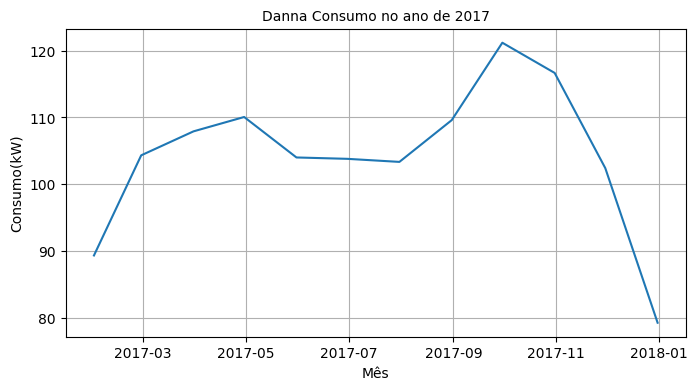

In [361]:
#@title **Comsumo no ano de 2017**
plt.figure(figsize=(8,4))

plt.grid(True)
plt.title('Danna Consumo no ano de 2017',  fontsize = 10)
plt.ylabel('Consumo(kW)',  fontsize = 10)
plt.xlabel('Mês',  fontsize = 10)

plt.plot(consumidor["Danna"].resample('ME').mean())

plt.show()

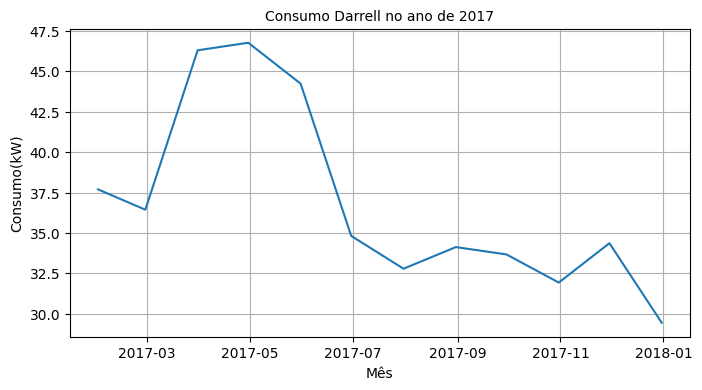

In [362]:
#@title **Comsumo no ano de 2017**
plt.figure(figsize=(8,4))

plt.grid(True)
plt.title('Consumo Darrell no ano de 2017',  fontsize = 10)
plt.ylabel('Consumo(kW)',  fontsize = 10)
plt.xlabel('Mês',  fontsize = 10)

plt.plot(consumidor["Darrell"].resample('ME').mean())

plt.show()

In [363]:
#@title **Acesso aos Arquivos Meterologicos**

arquivo = "./smart-grid/dados/2017/INMET_SE_ES_A612_VITORIA_01-01-2017_A_31-12-2017.CSV"

DadosMet = pd.read_csv(arquivo, delimiter=";", header=None, encoding="ISO-8859-1", skiprows=9)

colunas_selecionadas = [0,1,6, 7, 18]

DadosMet = DadosMet[colunas_selecionadas]
DadosMet.columns=['Dia','Hora','radiacao', 'temperatura', 'vento']
DadosMet = DadosMet.set_axis(list(DadosMet.iloc[:,0]), axis=0).iloc[:,1:]

DadosMet = DadosMet.replace("-9999", "0")

# # Trocar vírgulas por pontos na coluna
DadosMet.iloc[:,1] = DadosMet.iloc[:,1].str.replace(",", ".")
DadosMet.iloc[:,2] = DadosMet.iloc[:,2].str.replace(",", ".")
DadosMet.iloc[:,3] = DadosMet.iloc[:,3].str.replace(",", ".")


DadosMet.iloc[:,1:4] = DadosMet.iloc[:,1:4].astype("float64")

# Acerto zona
zona = pd.DataFrame({'Hora': ['21:00', '22:00', '23:00']}, index=["2016-12-31","2016-12-31","2016-12-31"])
zona = pd.concat([zona, DadosMet.iloc[:len(DadosMet)-3,0:1]])

DadosMet.index = zona.index
DadosMet.iloc[:,0] = zona

# Converter o índice para o tipo de dados 'datetime'
DadosMet.index = pd.to_datetime(DadosMet.index)

DadosMet = DadosMet.iloc[3:,:]

# Combine as colunas 'Dia' e 'Hora' em uma única coluna de data e hora
DadosMet['DateTime'] = pd.to_datetime(DadosMet.index.astype(str) + ' ' + DadosMet['Hora'])

# Configure o índice com a coluna 'DateTime'
DadosMet.set_index('DateTime', inplace=True)

# Remova as colunas 'Dia' e 'Hora', pois agora estão no índice
DadosMet.drop(columns=['Hora'], inplace=True)

# Redefina o nome do índice para None
DadosMet.index.name = None

DadosMet.index = pd.to_datetime(DadosMet.index)

DadosMet.iloc[:,0] = DadosMet.iloc[:,0]/1000
DadosMet

,radiacao,temperatura,vento
2017-01-01 00:00:00,0.0,25.9,1.9
2017-01-01 01:00:00,0.0,25.8,2.2
2017-01-01 02:00:00,0.0,25.5,1.4
2017-01-01 03:00:00,0.0,24.6,1.1
2017-01-01 04:00:00,0.0,24.3,0.9
...,...,...,...
2017-12-31 16:00:00,1.8275,30.5,3.9
2017-12-31 17:00:00,0.8012,28.4,3.8
2017-12-31 18:00:00,0.261,27.6,3.4
2017-12-31 19:00:00,0.009,27.4,2.6


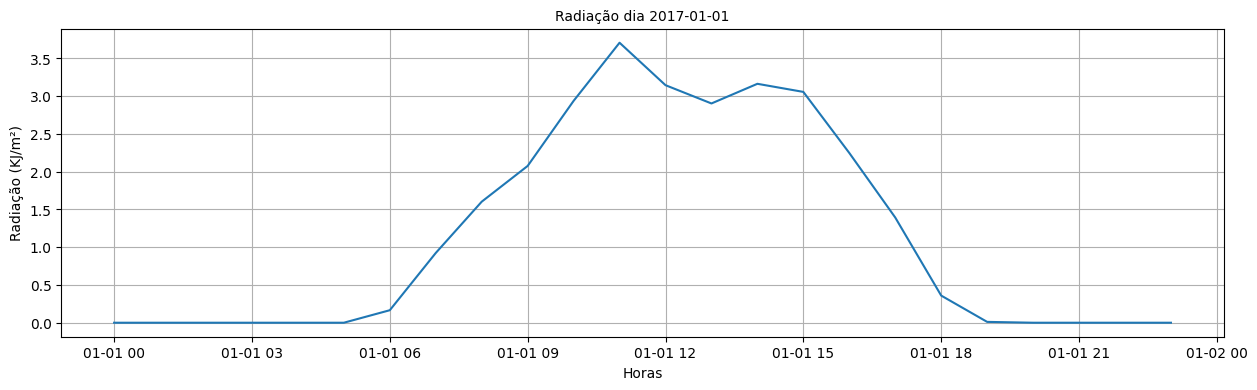

In [364]:
#@title **Gráfico radiação 2017-01-01**
plt.figure(figsize=(15,4))

plt.grid(True)
plt.title('Radiação dia 2017-01-01',  fontsize = 10)
plt.ylabel('Radiação (KJ/m²)',  fontsize = 10)
plt.xlabel('Horas',  fontsize = 10)

plt.plot(DadosMet.iloc[:24,0])
plt.show()

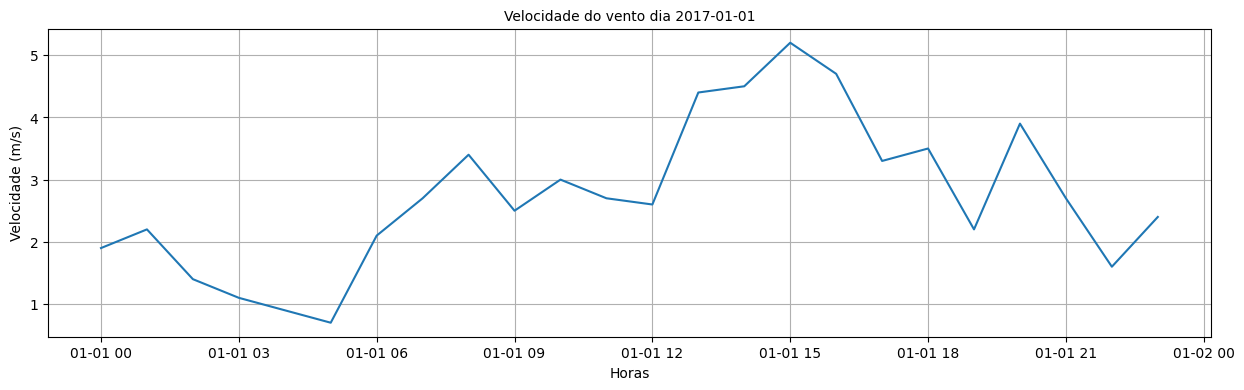

In [365]:
#@title **Gráfico Vento 2017-01-01**
plt.figure(figsize=(15,4))

plt.grid(True)
plt.title('Velocidade do vento dia 2017-01-01',  fontsize = 10)
plt.ylabel('Velocidade (m/s)',  fontsize = 10)
plt.xlabel('Horas',  fontsize = 10)

plt.plot(DadosMet.iloc[:24,2])
plt.show()

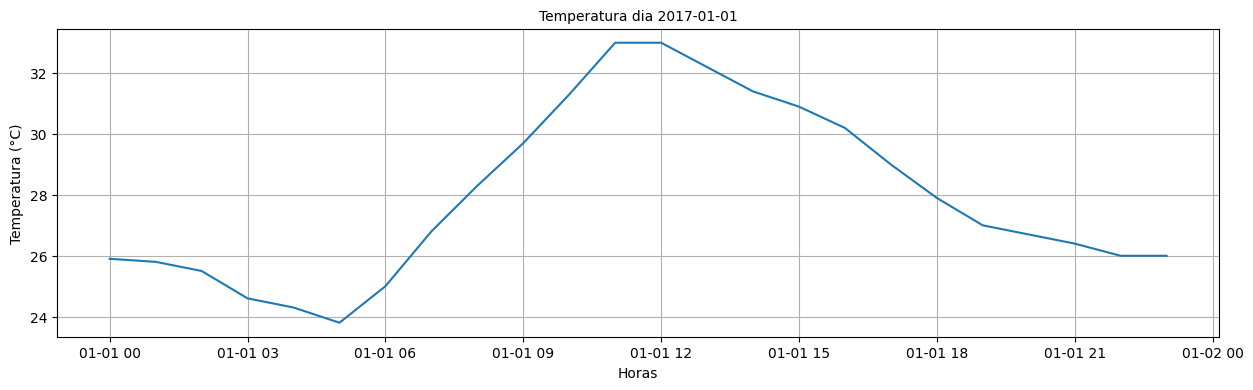

In [366]:
plt.figure(figsize=(15,4))

plt.grid(True)
plt.title('Temperatura dia 2017-01-01',  fontsize = 10)
plt.ylabel('Temperatura (°C)',  fontsize = 10)
plt.xlabel('Horas',  fontsize = 10)

plt.plot(DadosMet.iloc[:24,1])
plt.show()

In [367]:
#@title **Informações da placa**
# https://solmais.com.br/produtos/32065/painel-solar-sunova 

#POTENCIA GERADA PELOS PV's DO MODELO SS-600-72MDH TANGRA 600W N-TYPE MONO HALF CELL
Imppt = 13.39             # é a corrente no ponto de máxima potência (A).
Vmppt = 44.81             # é a tensão no ponto de máxima potência (V);
Not = 22.5                 # é a temperatura nominal de operação da célula (oC);
Isc = 14.1               # é a corrente de curto circuito da célula (A);
Voc = 52.79               # é a tensão de circuito aberto do módulo (V);
Ki = 0.046                # é o coeficiente de corrente/temperatura (A/ oC);
Kv = -0.26               # é o coeficiente de tensão/temperatura (V/ oC);
RNOCT = 1000
ta = 0.9
nc = 0.227

tam = len(DadosMet)     # é a quantidade de horas
power_placa = Voc*Isc   # é a potencia da Placa
horas_exposto = 12      # é a quantidade de horas de exposição da placa

In [368]:
consumo_medio = (consumidor['Danna']*1000).mean().iloc[0] # media Wh

NPaineis =  math.ceil((consumo_medio/ power_placa))
NPaineis

141

In [369]:
#@title **Painel solar**
PotPVM  = [];
for i in range(tam):
    r   = DadosMet.iloc[i,0]
    Ta  = DadosMet.iloc[i,1]
    Vw  = DadosMet.iloc[i,2]
    Tc  = Ta + ((r/RNOCT) * (9.5/(5.7+3.8*Vw)) * (Not-20) * (1 - (nc/ta)))   # Ta + r*(Not-20)/0.8
    I   = r * (Isc + Ki *(Tc-25))
    V   = Voc - Kv *(Tc-25)
    FF  = (Vmppt * Imppt)/(Voc * Isc)
    PotPVM.append(NPaineis * FF * V * I)

PotPVM = pd.DataFrame(PotPVM, index=DadosMet.index, columns=["Power (kW)"])/ 1000

PotPVM.iloc[:24,:]

,Power (kW)
2017-01-01 00:00:00,0.000000
2017-01-01 01:00:00,0.000000
2017-01-01 02:00:00,0.000000
2017-01-01 03:00:00,0.000000
2017-01-01 04:00:00,0.000000
2017-01-01 05:00:00,0.000000
2017-01-01 06:00:00,14.009922
2017-01-01 07:00:00,79.302205
2017-01-01 08:00:00,139.278702
2017-01-01 09:00:00,182.464592


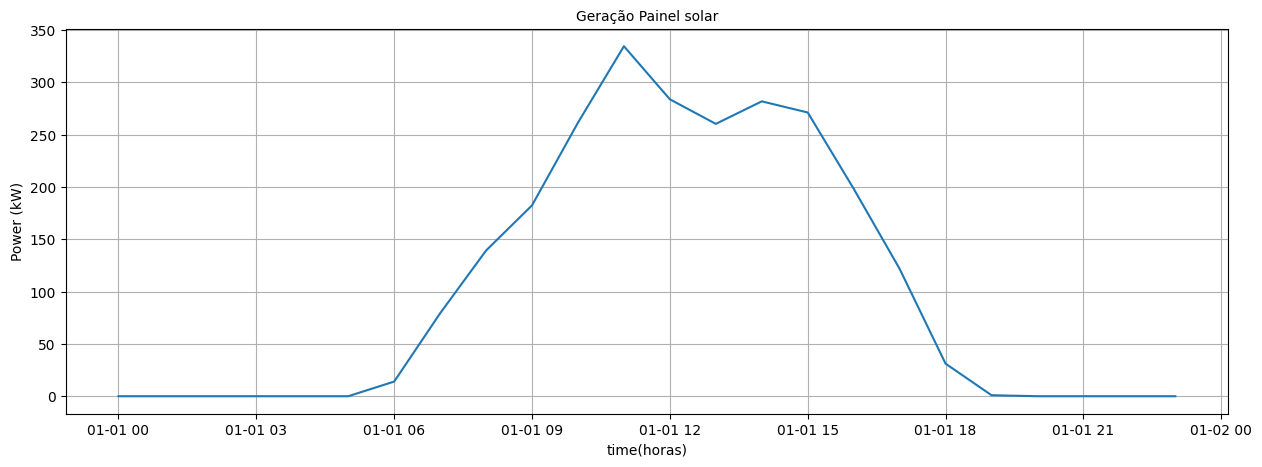

In [370]:
#@title **Geração no dia 1 de janeiro 2017**
plt.figure(figsize=(15,5))

plt.grid(True)
plt.title('Geração Painel solar',  fontsize = 10)
plt.ylabel('Power (kW)',  fontsize = 10)
plt.xlabel('time(horas)',  fontsize = 10)

plt.plot(PotPVM.iloc[:24,:])
plt.show()

In [371]:
#@title **EnergBaterry**

def energBaterry(g, l, max_battery):
  battery = 0
  bat   = l.copy()*0
  load  = l.copy()
  grid  = g.copy()
  
  for i, energ in enumerate(zip(load.iloc[:,0], grid.iloc[:,0])):
    c, geracao = energ
    if int(bat.iloc[i:i+1,:].index[0].strftime('%H')) == 1:
      battery = 0
    elif(i):
      battery    = bat.iloc[i-1,0]

    res   = geracao - c

    if(res < 0):
      c = (-1) * res
      res = 0
      c = c - battery
      if(c < 0):
        battery = (-1) * c
        c = 0
      else:
        battery = 0
    elif (battery < max_battery):
      c = 0
      if (res <= (max_battery-battery)):
        battery = battery + res
        res = 0
      else:
        battery = max_battery
        res     = res - (max_battery - battery)
    else:
      c = 0

    load.iloc[i,0]  = c
    grid.iloc[i,0]  = res
    bat.iloc[i,0]   = battery

    # print(c, res, battery)
  return grid, load, bat

In [372]:
# Bateria Megapack Tesla 1.9MW
max_battery = 1900 # kW
qtd_battery = 1

consumidor_baterry = {}
for chave, consumo in consumidor.items():
    grid, load, baterry     = energBaterry(PotPVM, consumo, max_battery * qtd_battery)
    consumidor_baterry[chave] = pd.concat([grid, load, baterry], axis=1) # type: ignore
    consumidor_baterry[chave].columns = ['grid', 'load', 'battery']

consumidor_baterry["Danna"].iloc[:48,:]

,grid,load,battery
2017-01-01 00:00:00,0.000000,41.500000,0.000000
2017-01-01 01:00:00,0.000000,41.750000,0.000000
2017-01-01 02:00:00,0.000000,41.750000,0.000000
2017-01-01 03:00:00,0.000000,41.750000,0.000000
2017-01-01 04:00:00,0.000000,40.250000,0.000000
2017-01-01 05:00:00,0.000000,41.500000,0.000000
2017-01-01 06:00:00,0.000000,27.240078,0.000000
2017-01-01 07:00:00,0.000000,0.000000,39.302205
2017-01-01 08:00:00,0.000000,0.000000,137.330907
2017-01-01 09:00:00,0.000000,0.000000,279.795499


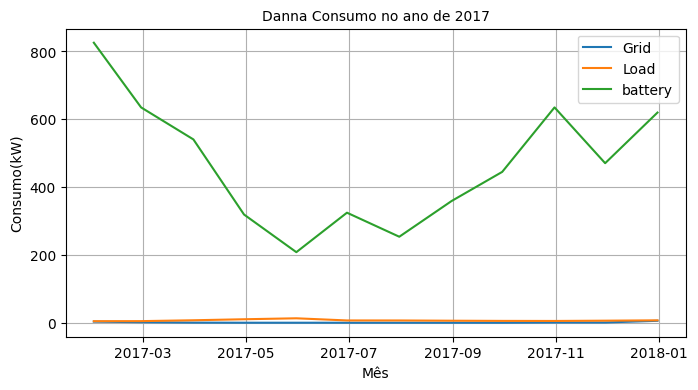

In [373]:
plt.figure(figsize=(8,4))

plt.grid(True)
plt.title('Danna Consumo no ano de 2017',  fontsize = 10)
plt.ylabel('Consumo(kW)',  fontsize = 10)
plt.xlabel('Mês',  fontsize = 10)

plt.plot(consumidor_baterry["Darrell"].resample('ME').mean())
plt.legend(['Grid', 'Load', 'battery'])
plt.show()

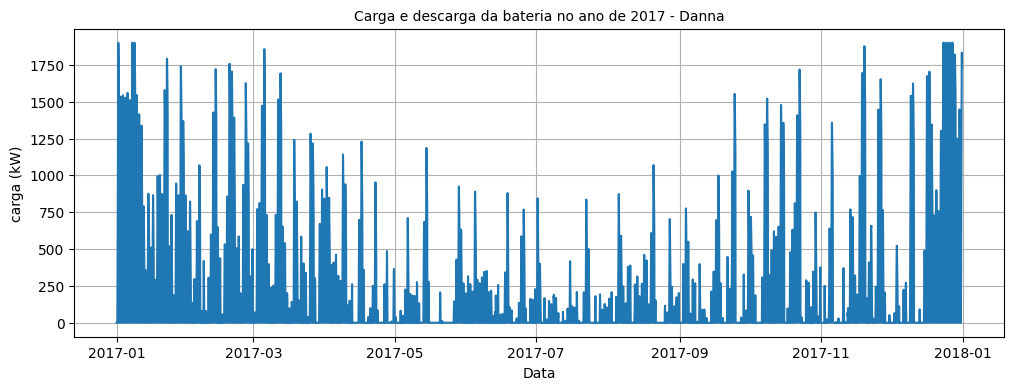

In [374]:
#@title **Carga e descarga da bateria nos primeiros 4 mês de Janeiro de 2017 - Danna**
plt.figure(figsize=(12,4))

plt.grid(True)
plt.title('Carga e descarga da bateria no ano de 2017 - Danna',  fontsize = 10)
plt.ylabel('carga (kW)',  fontsize = 10)
plt.xlabel('Data',  fontsize = 10)

plt.plot(consumidor_baterry["Danna"]['battery'])#.iloc[:24*30*4,2:3])

plt.show()

In [375]:
aux = consumidor_baterry["Danna"].sum()
aux

grid       2.525164e+03
load       4.502978e+05
battery    1.822216e+06
dtype: float64

In [376]:
from web3 import EthereumTesterProvider, Web3
import json

host = 'HTTP://127.0.0.1:7545'

w3 = Web3(Web3.HTTPProvider(host))

w3.eth.default_account = w3.eth.accounts[0]

# Busca informações do contrado no json
with open('../build/contracts/energy.json', 'r') as arquivo:
    date = json.load(arquivo)

# Busca o endereço do contrato
tx_02 = w3.eth.get_transaction_by_block(2, 0)
tx_contract_creat = w3.eth.wait_for_transaction_receipt(tx_02['hash']) # type: ignore

# instancia o contrato
contract_instance = w3.eth.contract(address=tx_contract_creat['contractAddress'], bytecode= date["bytecode"], abi=date["abi"]) # type: ignore
print(contract_instance)

users       = w3.eth.accounts[1:3]

contract_instance.functions.addUser(users[0]).transact({"from": w3.eth.default_account}) # type: ignore
contract_instance.functions.addUser(users[1]).transact({"from": w3.eth.default_account}) # type: ignore

HexBytes('0x98553be2866f252059cfd1264906a4e8c5f0f82efea5ab652103c60c2bd24244')

In [377]:
l = {chave : value.iloc[:,1:2].copy() for chave, value in consumidor_baterry.items()}
aux = ''

u_cr= {chave : value.iloc[:,:1].copy()*0 for chave, value in consumidor_baterry.items()}
u_cr = {chave: value.rename(columns={'grid': 'credito'}) for chave, value in u_cr.items()}

values = [x[1] for x in consumidor_baterry.items()]
chaves = [x[0] for x in consumidor_baterry.items()]

for (index, row1), (_, row2) in zip(values[0].iterrows(), values[1].iterrows()):
    for i, (row, chave) in enumerate(zip([row1, row2], chaves)):
        if (aux != 'c'):
            aux = str(input())
        elif (aux == 'x'):
            exit()
        ex = row['grid']
        
        if index.hour == 0:
            ex += row['battery']
        
        userBalance = contract_instance.functions.totalBalanceUser().call({'from':users[i]})
        
        # User
        if int(ex) > 0:
            print(f'Usuário {i+1}: Enviando excedente de energia para o contrato na hora {index}')
            tx1_hash = contract_instance.functions.deposit().transact({"from": users[i], 'value': int(ex)}) # type: ignore
            u_cr[chave].loc[index,:] = ex 
            
        elif (0 < int(row['load']) <= userBalance):
            print(f'Usuário {i+1}: Utilizando credito do contrato na hora {index}')
            contract_instance.functions.withdraw(int(row['load'])).transact({'from':users[i]}) # type: ignore
            l[chave].loc[index,:]     -= row['load']
            u_cr[chave].loc[index,:]  -= row['load']
            
        elif (userBalance > 0 and int(row['load']) > 0 ):
            print(f'Usuário {i+1}: Utilizando credito do contrato na hora {index}')
            contract_instance.functions.withdraw(userBalance).transact({'from':users[i]}) # type: ignore
            l[chave].loc[index,:]     -= userBalance
            u_cr[chave].loc[index,:]  -= userBalance
            
    if index.hour == 0:
        print('Executando cálculo de saldo à meia-noite data: ' + index.strftime("%Y/%m/%d"))
        tx_hash = contract_instance.functions.calculateBalances().transact({"from": w3.eth.default_account}) # type: ignore

Usuário 1: Utilizando credito do contrato na hora 2017-01-01 00:00:00
Usuário 2: Utilizando credito do contrato na hora 2017-01-01 00:00:00
Executando cálculo de saldo à meia-noite data: 2017/01/01
Usuário 1: Utilizando credito do contrato na hora 2017-01-01 01:00:00
Usuário 2: Utilizando credito do contrato na hora 2017-01-01 01:00:00
Usuário 1: Utilizando credito do contrato na hora 2017-01-01 02:00:00
Usuário 2: Utilizando credito do contrato na hora 2017-01-01 02:00:00
Usuário 1: Utilizando credito do contrato na hora 2017-01-01 03:00:00
Usuário 2: Utilizando credito do contrato na hora 2017-01-01 03:00:00
Usuário 1: Utilizando credito do contrato na hora 2017-01-01 04:00:00
Usuário 2: Utilizando credito do contrato na hora 2017-01-01 04:00:00
Usuário 1: Utilizando credito do contrato na hora 2017-01-01 05:00:00
Usuário 2: Utilizando credito do contrato na hora 2017-01-01 05:00:00
Usuário 1: Utilizando credito do contrato na hora 2017-01-01 06:00:00
Usuário 2: Utilizando credito do

In [378]:
aux2 = consumidor_baterry["Danna"].copy()
aux2

,grid,load,battery
2017-01-01 00:00:00,0.0,41.50,0.000000
2017-01-01 01:00:00,0.0,41.75,0.000000
2017-01-01 02:00:00,0.0,41.75,0.000000
2017-01-01 03:00:00,0.0,41.75,0.000000
2017-01-01 04:00:00,0.0,40.25,0.000000
...,...,...,...
2017-12-31 16:00:00,0.0,0.00,1802.719703
2017-12-31 17:00:00,0.0,0.00,1832.901783
2017-12-31 18:00:00,0.0,0.00,1812.705095
2017-12-31 19:00:00,0.0,0.00,1771.731535


In [379]:
aux2.max().iloc[0]

223.1203028358699

In [380]:
aux2.mean().iloc[0]

0.2883594375825622

In [381]:
(aux2.mean().iloc[0] / aux2.max().iloc[0]) * 100

0.12923944343813618

In [382]:
aux = u_cr["Danna"].copy()

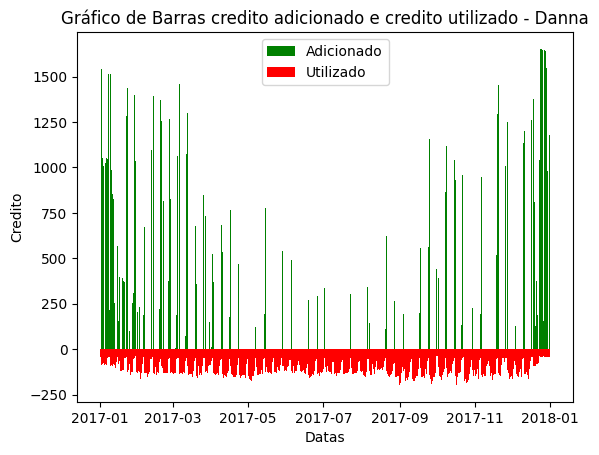

In [383]:
# Dividindo os dados em positivos e negativos
valores_positivos = aux['credito'].apply(lambda x: max(0, x))
valores_negativos = aux['credito'].apply(lambda x: min(0, x))

# Plotar barras positivas
plt.bar(u_cr["Danna"].index, valores_positivos, color='green')

# Plotar barras negativas abaixo do eixo x
plt.bar(u_cr["Danna"].index, valores_negativos, color='red')

# Configurações adicionais
plt.xlabel('Datas')
plt.ylabel('Credito')
plt.title('Gráfico de Barras credito adicionado e credito utilizado - Danna')
plt.legend(['Adicionado', 'Utilizado'])

# Exibir o gráfico
plt.show()

In [412]:
print(f"Total balance contrato: {contract_instance.functions.totalBalance().call()}")

Total balance contrato: 410652


In [413]:
print(f"Total balance Danna: {contract_instance.functions.totalBalanceUser().call({'from':users[0]})}")

Total balance Danna: 102663


In [415]:
print(f"Total balance Darrell: {contract_instance.functions.totalBalanceUser().call({'from':users[1]})}")

Total balance Darrell: 102663


In [387]:
# contract_instance.functions.withdraw(100).transact({'from':users[1]}) # type: ignore

In [416]:
contract_instance.functions.calculateBalances().transact({"from": w3.eth.default_account}) # type: ignore

HexBytes('0x0f84936dc7c458c44352f97cdcd8e3200538c861a9298f81d32c43bac4c34fc6')

In [418]:
total_load_com_chain = l["Danna"].sum().iloc[0]
print(f"Total a ser pago por Danna utilizando blockchain {round(total_load_com_chain, 2)} kW")

Total a ser pago por Danna utilizando blockchain 4.47 kW


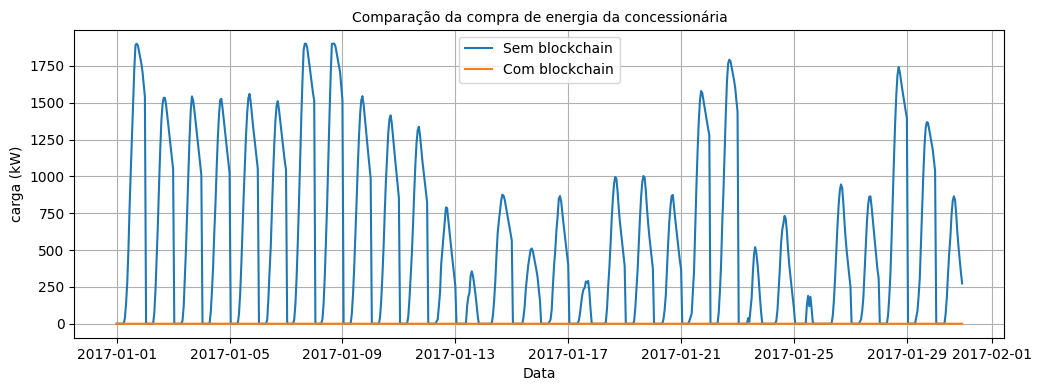

In [419]:
plt.figure(figsize=(12,4))

plt.grid(True)
plt.title('Comparação da compra de energia da concessionária',  fontsize = 10)
plt.ylabel('carga (kW)',  fontsize = 10)
plt.xlabel('Data',  fontsize = 10)

plt.plot(consumidor_baterry["Danna"].iloc[:24*30*1,2:3], label="Sem blockchain")
plt.plot(l["Danna"].iloc[:24*30*1,:1], label="Com blockchain")

plt.legend()

plt.show()